In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
import statsmodels.api as sm
import sqlite3

In [65]:
# Create a query to select the necessary data
query = """
SELECT 
    sp.CensusTract, 
    sp.Grade, 
    sp.[Percentage Standard Met and Above], 
    sp.[School Name], 
    ea.CensusTract, 
    ea.[Estimate!!Total:], 
    ea.[Estimate!!Total:!!No schooling completed],
    ea.[Estimate!!Total:!!Nursery school],
    ea.[Estimate!!Total:!!Kindergarten],
    ea.[Estimate!!Total:!!1st grade],
    ea.[Estimate!!Total:!!2nd grade],
    ea.[Estimate!!Total:!!3rd grade],
    ea.[Estimate!!Total:!!4th grade],
    ea.[Estimate!!Total:!!5th grade],
    ea.[Estimate!!Total:!!6th grade],
    ea.[Estimate!!Total:!!7th grade],
    ea.[Estimate!!Total:!!8th grade],
    ea.[Estimate!!Total:!!9th grade],
    ea.[Estimate!!Total:!!10th grade],
    ea.[Estimate!!Total:!!11th grade],
    ea.[Estimate!!Total:!!12th grade, no diploma],
    ea.[Estimate!!Total:!!Regular high school diploma],
    ea.[Estimate!!Total:!!GED or alternative credential],
    ea.[Estimate!!Total:!!Some college, less than 1 year],
    ea.[Estimate!!Total:!!Some college, 1 or more years, no degree],
    ea.[Estimate!!Total:!!Associate's degree],
    ea.[Estimate!!Total:!!Bachelor's degree],
    ea.[Estimate!!Total:!!Master's degree],
    ea.[Estimate!!Total:!!Professional school degree],
    ea.[Estimate!!Total:!!Doctorate degree],
    i.CensusTract, 
    i.[Estimate!!Households!!Total],
    i.[Estimate!!Households!!Total!!Less than $10,000],
    i.[Estimate!!Households!!Total!!$10,000 to $14,999],
    i.[Estimate!!Households!!Total!!$15,000 to $24,999],
    i.[Estimate!!Households!!Total!!$25,000 to $34,999],
    i.[Estimate!!Households!!Total!!$35,000 to $49,999],
    i.[Estimate!!Households!!Total!!$50,000 to $74,999],
    i.[Estimate!!Households!!Total!!$75,000 to $99,999],
    i.[Estimate!!Households!!Total!!$100,000 to $149,999],
    i.[Estimate!!Households!!Total!!$150,000 to $199,999],
    i.[Estimate!!Households!!Total!!$200,000 or more],
    i.[Estimate!!Households!!Median income (dollars)],
    i.[Estimate!!Households!!Mean income (dollars)]
FROM 
    SchoolPerform sp
JOIN 
    EdAttain ea ON sp.CensusTract = ea.CensusTract
JOIN 
    Income i ON sp.CensusTract = i.CensusTract
"""

# Define the database file path
db_file = '/home/philip/DataAnalytics/eddata/data/school_performance.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_file)

# Load the query results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
df.head()


,CensusTract,Grade,Percentage Standard Met and Above,School Name,CensusTract,Estimate!!Total:,Estimate!!Total:!!No schooling completed,Estimate!!Total:!!Nursery school,Estimate!!Total:!!Kindergarten,Estimate!!Total:!!1st grade,...,"Estimate!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999","Estimate!!Households!!Total!!$75,000 to $99,999","Estimate!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars)
0,06001401300,6,26.32,Envision Academy for Arts & Technology,06001401300,3541,104,0,0,0,...,2.7,4.3,7.8,5.8,11.2,32.8,8.8,16.7,105556,133185
1,06001401400,6,26.32,Envision Academy for Arts & Technology,06001401400,3655,74,0,0,0,...,3.0,7.5,4.2,8.2,14.8,23.1,6.7,13.6,87208,101569
2,06001401600,6,26.32,Envision Academy for Arts & Technology,06001401600,1777,59,0,0,0,...,5.2,3.5,7.0,11.1,9.6,9.8,10.0,36.4,135234,162072
3,06001402600,6,26.32,Envision Academy for Arts & Technology,06001402600,979,64,0,6,0,...,11.2,0.0,13.2,15.5,6.4,5.7,5.7,13.7,48362,101047
4,06001402700,6,26.32,Envision Academy for Arts & Technology,06001402700,1577,36,0,0,0,...,5.1,4.2,5.4,5.5,8.6,21.4,5.8,22.1,97250,132023


In [66]:
# Convert necessary columns to numeric
cols_to_convert = ['Estimate!!Total:', 'Estimate!!Total:!!No schooling completed', 'Estimate!!Total:!!Nursery school', 'Estimate!!Total:!!Kindergarten', 'Estimate!!Total:!!1st grade', 'Estimate!!Total:!!2nd grade', 'Estimate!!Total:!!3rd grade', 'Estimate!!Total:!!4th grade', 'Estimate!!Total:!!5th grade', 'Estimate!!Total:!!6th grade', 'Estimate!!Total:!!7th grade', 'Estimate!!Total:!!8th grade', 'Estimate!!Total:!!9th grade', 'Estimate!!Total:!!10th grade', 'Estimate!!Total:!!11th grade', 'Estimate!!Total:!!12th grade, no diploma', 'Estimate!!Total:!!Regular high school diploma', 'Estimate!!Total:!!GED or alternative credential', 'Estimate!!Total:!!Some college, less than 1 year', 'Estimate!!Total:!!Some college, 1 or more years, no degree', "Estimate!!Total:!!Associate's degree", "Estimate!!Total:!!Bachelor's degree", "Estimate!!Total:!!Master's degree", 'Estimate!!Total:!!Professional school degree', 'Estimate!!Total:!!Doctorate degree']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Calculate LessThanHS
df['LessThanHS'] = (
    df['Estimate!!Total:!!No schooling completed'] +
    df['Estimate!!Total:!!Nursery school'] +
    df['Estimate!!Total:!!Kindergarten'] +
    df['Estimate!!Total:!!1st grade'] +
    df['Estimate!!Total:!!2nd grade'] +
    df['Estimate!!Total:!!3rd grade'] +
    df['Estimate!!Total:!!4th grade'] +
    df['Estimate!!Total:!!5th grade'] +
    df['Estimate!!Total:!!6th grade'] +
    df['Estimate!!Total:!!7th grade'] +
    df['Estimate!!Total:!!8th grade'] +
    df['Estimate!!Total:!!9th grade'] +
    df['Estimate!!Total:!!10th grade'] +
    df['Estimate!!Total:!!11th grade'] +
    df['Estimate!!Total:!!12th grade, no diploma']
) / df['Estimate!!Total:']

# Calculate HSNoDegree
df['HSNoDegree'] = (
    df['Estimate!!Total:!!Regular high school diploma'] +
    df['Estimate!!Total:!!GED or alternative credential'] +
    df['Estimate!!Total:!!Some college, less than 1 year'] +
    df['Estimate!!Total:!!Some college, 1 or more years, no degree']
) / df['Estimate!!Total:']

# Calculate HasDegree
df['HasDegree'] = (
    df['Estimate!!Total:!!Associate\'s degree'] +
    df['Estimate!!Total:!!Bachelor\'s degree'] +
    df['Estimate!!Total:!!Master\'s degree'] +
    df['Estimate!!Total:!!Professional school degree'] +
    df['Estimate!!Total:!!Doctorate degree']
) / df['Estimate!!Total:']

# Display the updated DataFrame
df[['LessThanHS', 'HSNoDegree', 'HasDegree']].head()


,LessThanHS,HSNoDegree,HasDegree
0,0.089805,0.306128,0.604067
1,0.154036,0.318194,0.527770
2,0.159820,0.374226,0.465954
3,0.262513,0.279877,0.457610
4,0.127457,0.263792,0.608751


In [67]:
print(df.columns)
print(df.shape)
print(df.dtypes)
print(df.describe())
print(df.isnull().sum())


Index(['CensusTract', 'Grade', 'Percentage Standard Met and Above',
       'School Name', 'CensusTract', 'Estimate!!Total:',
       'Estimate!!Total:!!No schooling completed',
       'Estimate!!Total:!!Nursery school', 'Estimate!!Total:!!Kindergarten',
       'Estimate!!Total:!!1st grade', 'Estimate!!Total:!!2nd grade',
       'Estimate!!Total:!!3rd grade', 'Estimate!!Total:!!4th grade',
       'Estimate!!Total:!!5th grade', 'Estimate!!Total:!!6th grade',
       'Estimate!!Total:!!7th grade', 'Estimate!!Total:!!8th grade',
       'Estimate!!Total:!!9th grade', 'Estimate!!Total:!!10th grade',
       'Estimate!!Total:!!11th grade',
       'Estimate!!Total:!!12th grade, no diploma',
       'Estimate!!Total:!!Regular high school diploma',
       'Estimate!!Total:!!GED or alternative credential',
       'Estimate!!Total:!!Some college, less than 1 year',
       'Estimate!!Total:!!Some college, 1 or more years, no degree',
       'Estimate!!Total:!!Associate's degree',
       'Estimate!!Tota

In [68]:
null_hs_no_degree = df[df['HSNoDegree'].isnull()]
print(null_hs_no_degree)

        CensusTract  Grade Percentage Standard Met and Above  \
21535   06013990000     11                             46.15   
21544   06013990000     13                             46.15   
21553   06013990000     11                             14.50   
21562   06013990000     13                             14.50   
21809   06013990000      5                                 *   
...             ...    ...                               ...   
239072  06083980000     13                             66.67   
239090  06083980000      3                                 *   
239108  06083980000      4                                 *   
239126  06083980000      5                                 *   
239144  06083980000     13                             53.33   

                                             School Name  CensusTract  \
21535                Leadership Public Schools: Richmond  06013990000   
21544                Leadership Public Schools: Richmond  06013990000   
21553       

There are several schools, the majority of which appear to be correctional facilities or charter schools that do not have any data.  Some of these nulls are due to the small number of students tested.  The state of California does not release data for schools with a small number of students tested.  The data is not missing, it is suppressed.  The data is suppressed to protect the privacy of the students.  I have not been able to locate information about testing in correctional facilities.  

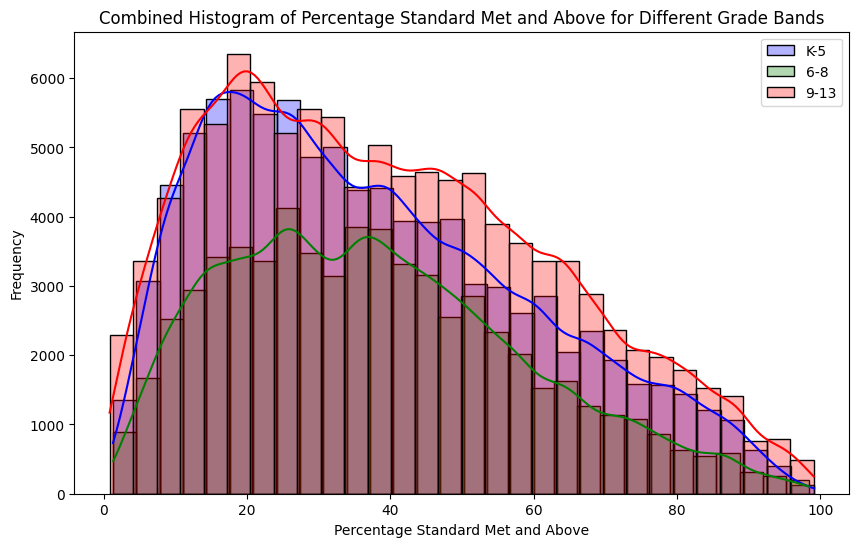

In [ ]:
# Convert 'Percentage Standard Met and Above' to numeric
df['Percentage Standard Met and Above'] = pd.to_numeric(df['Percentage Standard Met and Above'], errors='coerce')

# Filter the DataFrame for different grade bands
df_k5 = df[(df['Grade'] >= 0) & (df['Grade'] <= 5)]
df_6_8 = df[(df['Grade'] >= 6) & (df['Grade'] <= 8)]
df_9_13 = df[(df['Grade'] >= 9) & (df['Grade'] <= 13)]

# Filter out rows where 'Percentage Standard Met and Above' is 0 or 100
df_k5 = df_k5[(df_k5['Percentage Standard Met and Above'] > 0) & (df_k5['Percentage Standard Met and Above'] < 100)]
df_6_8 = df_6_8[(df_6_8['Percentage Standard Met and Above'] > 0) & (df_6_8['Percentage Standard Met and Above'] < 100)]
df_9_13 = df_9_13[(df_9_13['Percentage Standard Met and Above'] > 0) & (df_9_13['Percentage Standard Met and Above'] < 100)]

# Create a combined histogram with transparent colors
plt.figure(figsize=(10, 6))
sns.histplot(df_k5['Percentage Standard Met and Above'].dropna(), bins=30, kde=True, color='blue', label='K-5', alpha=0.3)
sns.histplot(df_6_8['Percentage Standard Met and Above'].dropna(), bins=30, kde=True, color='green', label='6-8', alpha=0.3)
sns.histplot(df_9_13['Percentage Standard Met and Above'].dropna(), bins=30, kde=True, color='red', label='9-13', alpha=0.3)

plt.xlabel('Percentage Standard Met and Above')
plt.ylabel('Frequency')
plt.title('Combined Histogram of Percentage Standard Met and Above for Different Grade Bands')
plt.legend()
plt.show()


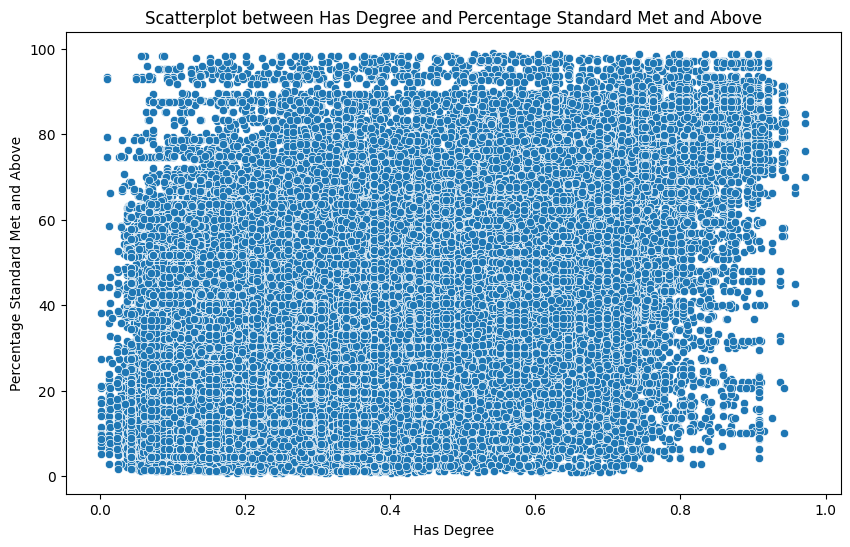

In [70]:

# Filter the DataFrame to include only grade 13
df_filtered = df[df['Grade'] == 13]
# Filter out rows where 'Percentage Standard Met and Above' is 0 or 100
df_filtered = df_filtered[(df_filtered['Percentage Standard Met and Above'] > 0) & (df_filtered['Percentage Standard Met and Above'] < 100)]
# Filter out rows where 'HasDegree' is 0 or 1
df_filtered = df_filtered[(df_filtered['HasDegree'] > 0) & (df_filtered['HasDegree'] < 1)]

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HasDegree', y='Percentage Standard Met and Above', data=df_filtered)
plt.xlabel('Has Degree')
plt.ylabel('Percentage Standard Met and Above')
plt.title('Scatterplot between Has Degree and Percentage Standard Met and Above')
plt.show()

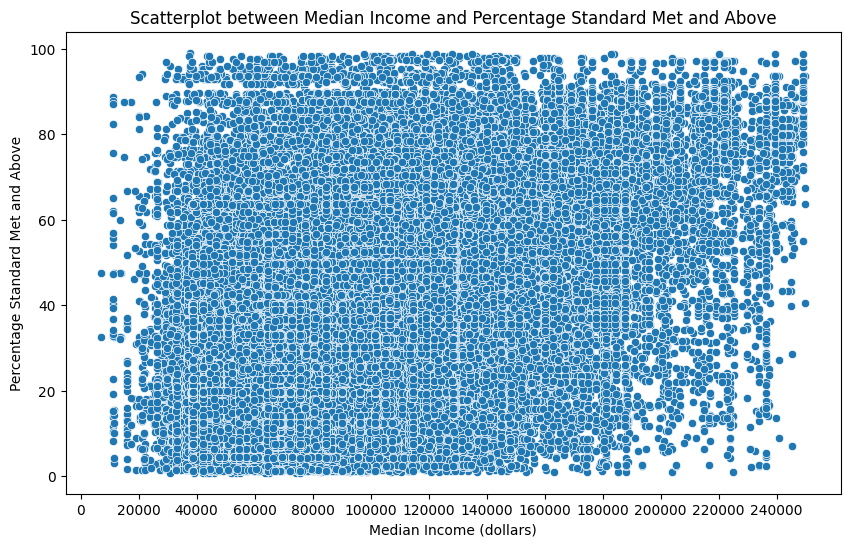

In [77]:
# Filter the DataFrame to include only grade 13
df_filtered = df[df['Grade'] == 13]
# Filter out rows where 'Percentage Standard Met and Above' is 0 or 100
df_filtered = df_filtered[(df_filtered['Percentage Standard Met and Above'] > 0) & (df_filtered['Percentage Standard Met and Above'] < 100)]

# Convert 'Estimate!!Households!!Median income (dollars)' to numeric
df_filtered['Estimate!!Households!!Median income (dollars)'] = pd.to_numeric(df_filtered['Estimate!!Households!!Median income (dollars)'], errors='coerce')

# Create a scatterplot with fewer x-axis tick marks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimate!!Households!!Median income (dollars)', y='Percentage Standard Met and Above', data=df_filtered)
plt.xlabel('Median Income (dollars)')
plt.ylabel('Percentage Standard Met and Above')
plt.title('Scatterplot between Median Income and Percentage Standard Met and Above')

# Reduce the number of x-axis tick marks
plt.xticks(ticks=np.arange(0, df_filtered['Estimate!!Households!!Median income (dollars)'].max(), step=20000))

plt.show()